![title](https://pythonawesome.com/content/images/2018/05/scikit-learn.png)

In [1]:
# Import libraries we will need in the following
import pandas as pd
import numpy as np
import scipy.io as sio

%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Regression

In statistics, several methods to search for relationships among variables goes under the name of __regression__.

## Polynomial Regression

Further than a simple linear relation between two quantities, one can look for a regression law relating several features to a continuous value, or even looking for something more complex than a linear fit.
The simplest way to do so is to make use of [_polynomials_](https://en.wikipedia.org/wiki/Polynomial)

For example, we want to study the trend of water level of a bathub as a function of the water falling off from a dam. We load data from a file and collect them into a known and loved pandas dataframe

In [2]:
dataset = sio.loadmat('datasets/PolReg/dataset.mat') # load a .mat file. Recall the function loadmat returns a dictonary

In [3]:
# Give names to variables

X = dataset['X']
X_test = dataset['Xtest']
X_val = dataset['Xval']
y = dataset['y']
y_test = dataset['ytest']
y_val = dataset['yval']

Why all these variables? 
We need only `X` and `y`, don't we?

Exploring the role of the other quantities is the aim of this lecture.

For the moment being, let's focus on the pandas DataFrame containing values stores in `X` and `y`.

In [4]:
measures = pd.DataFrame({'Change in water level' : X.flatten(), 'Water flowing out of the dam': y.flatten()})

In [5]:
measures = measures.sort_values(by = ['Change in water level']) 

__questions:__ Why do we sort values? Is it strictly necessary?

Try to ignore the executution the cell above, and see whether something changes.

Let's plot data, with trend polynomial of several degrees.

In [6]:
# complete the function
def plot_poly(x, y, xlabel, ylabel, max_degree = 10):
    """
        :return: plots of data in measures, with axis legends given by xlabel and ylabel, and polynomial trend curves
        from degree 0 to max_degree (default = 10).
    """
    for k in range(max_degree + 1):
        measures.plot(kind='scatter', x = xlabel, y = ylabel, color='blue', figsize=(7,5))
        z = np.polyfit(x, y, k)
        p = np.poly1d(z)
        plt.plot(x, p(x), "r--", label='polynomial of degree %s'%k)
        pst = plt.legend(loc='lower right', frameon=True)
        plt.show()

In [7]:
x = measures['Change in water level']
y = measures['Water flowing out of the dam']
xlabel = 'Change in water level'
ylabel = 'Water flowing out of the dam'

Call the function defined above to plot curve trends.

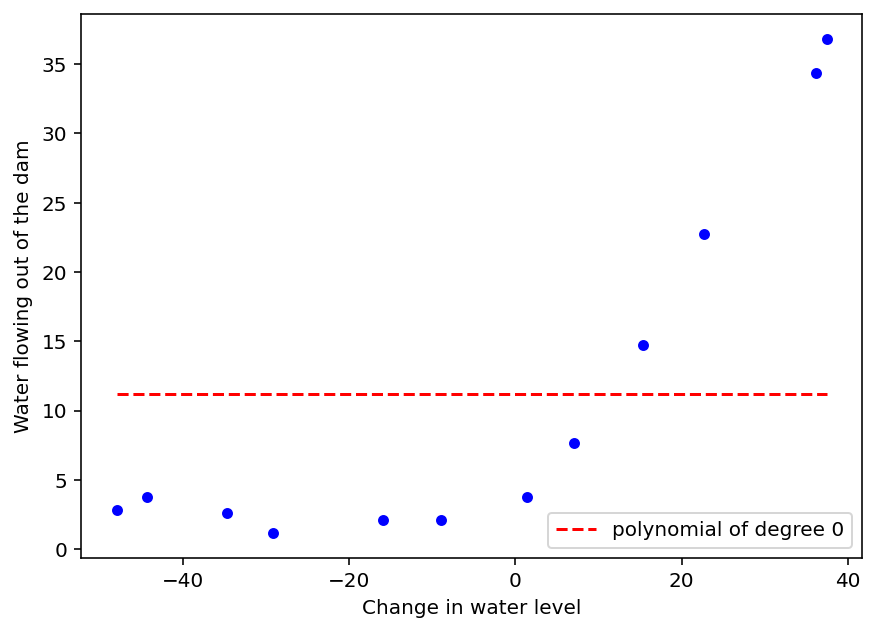

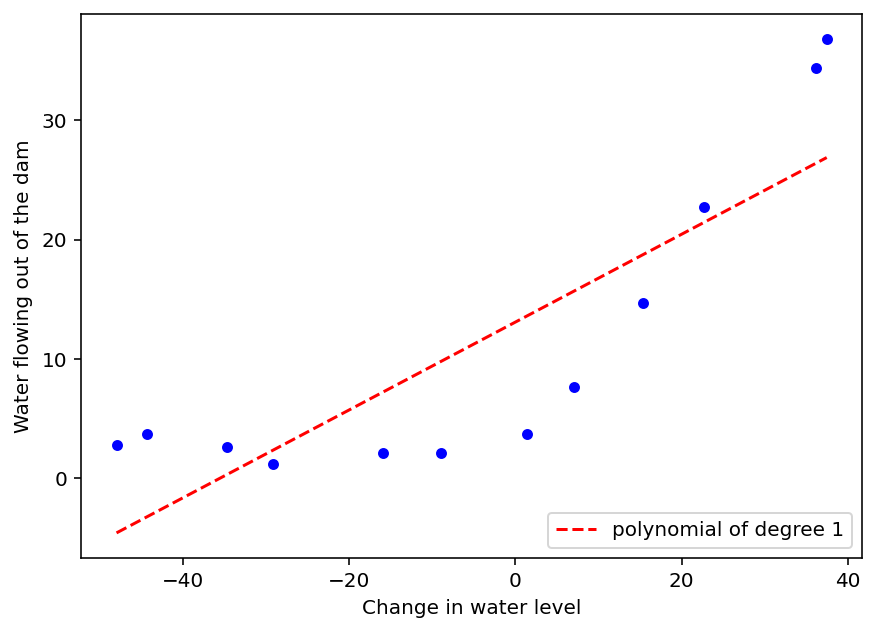

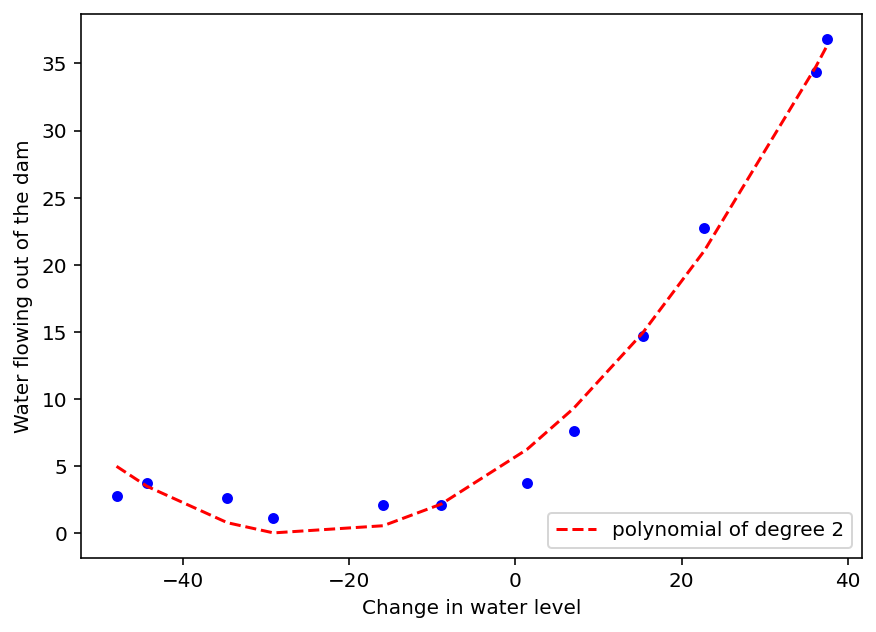

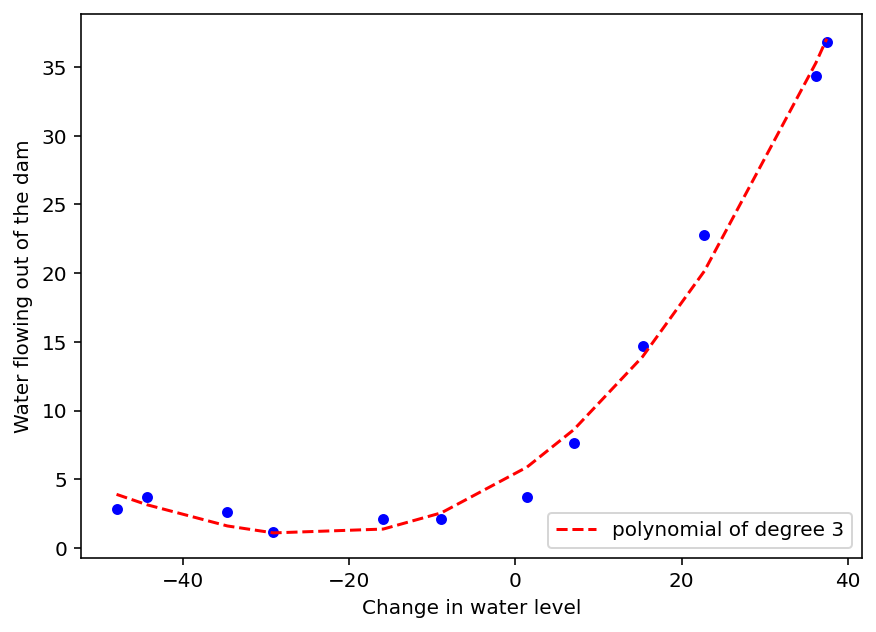

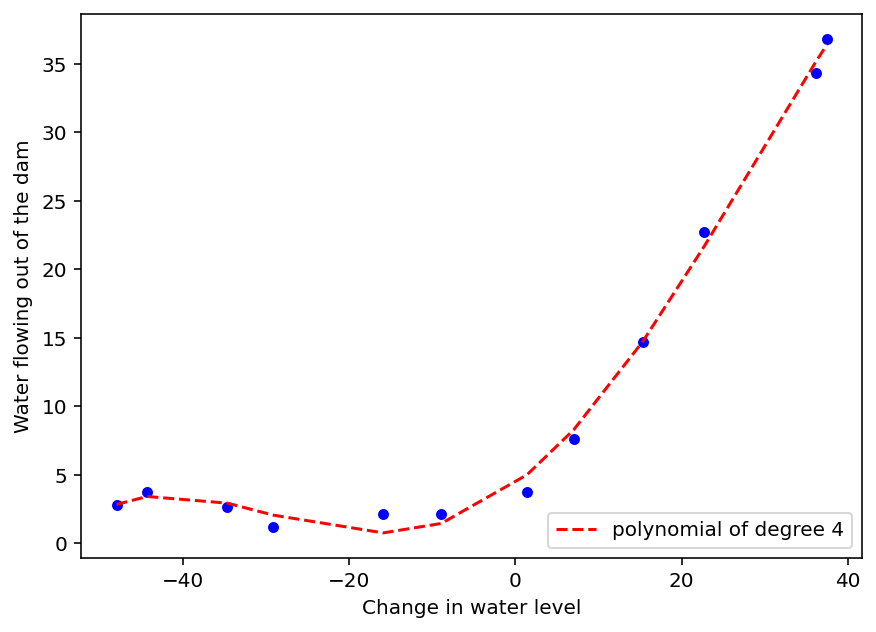

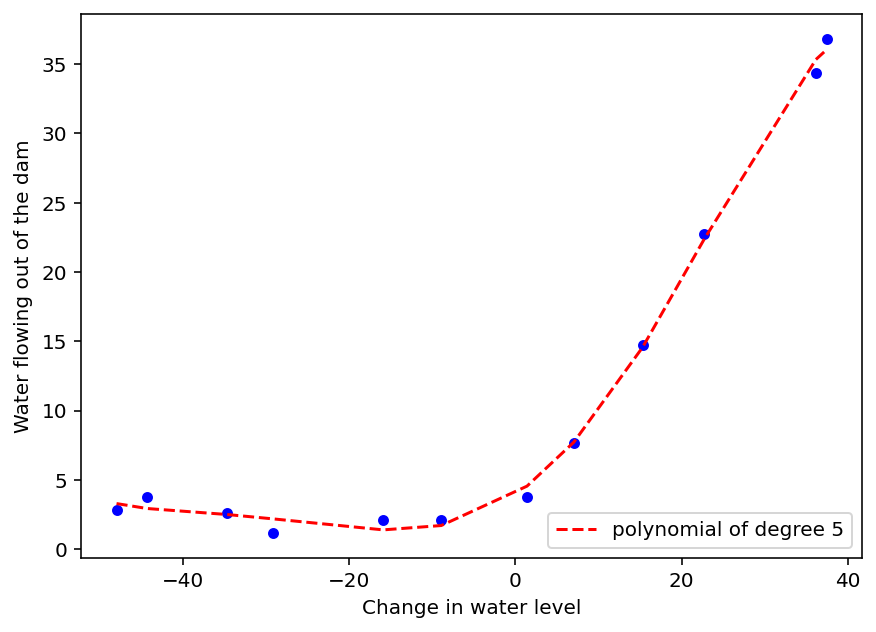

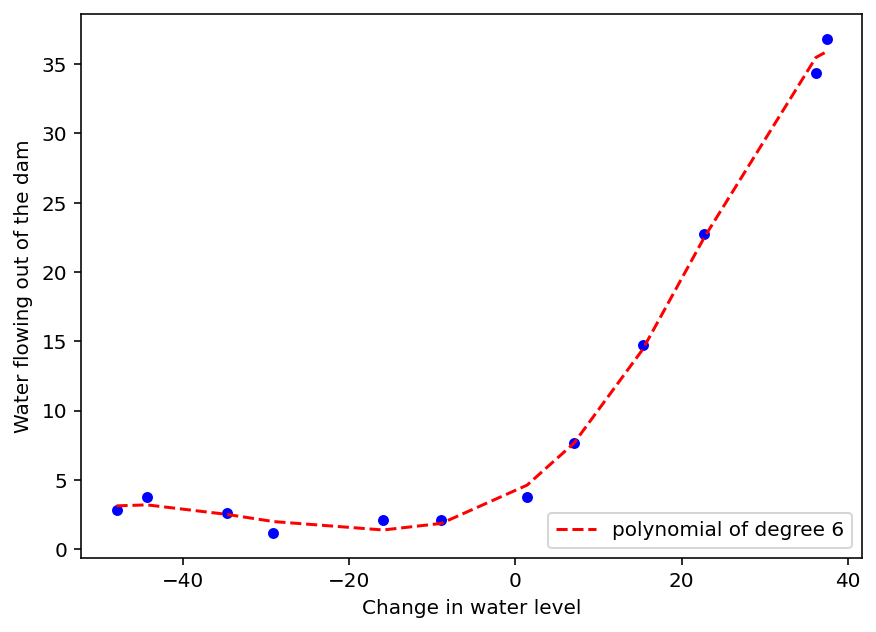

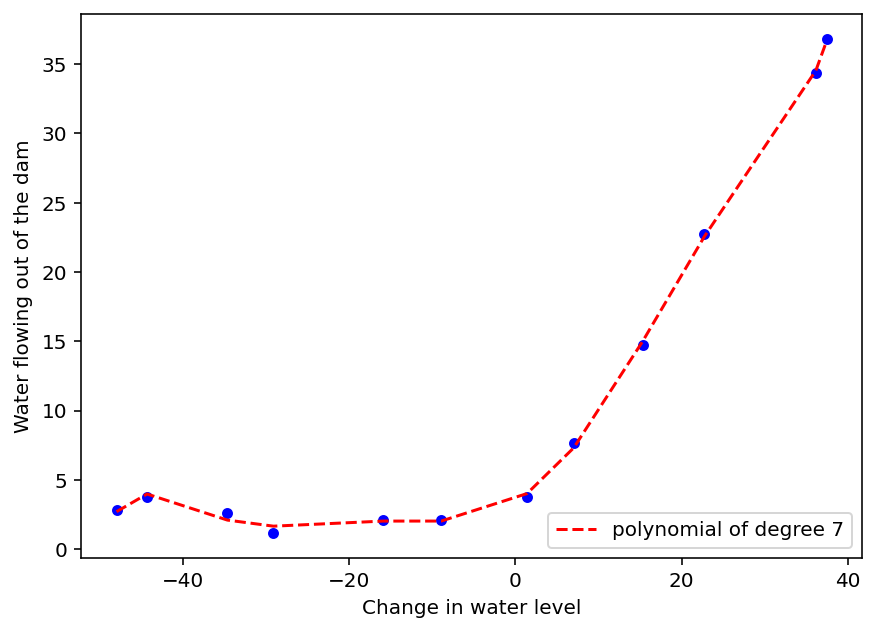

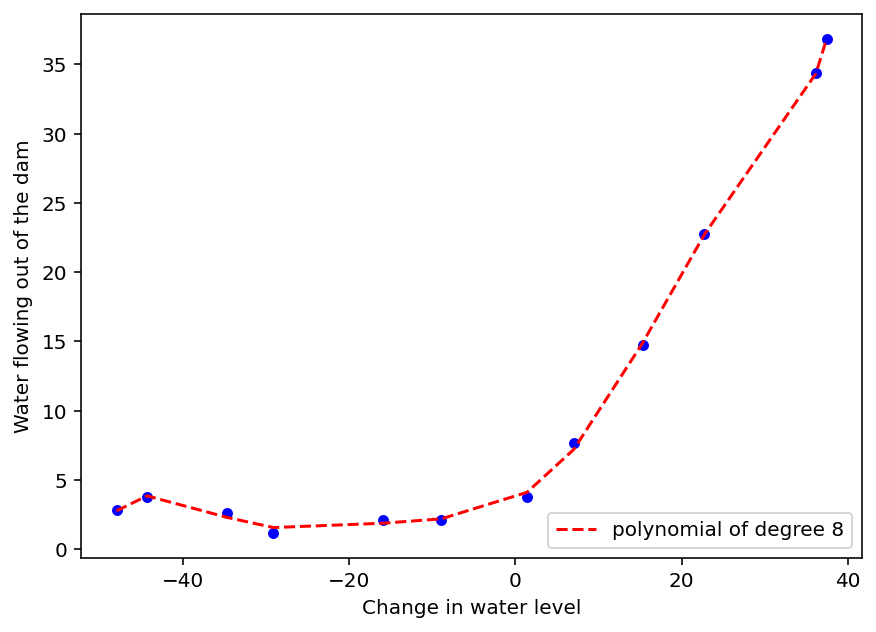

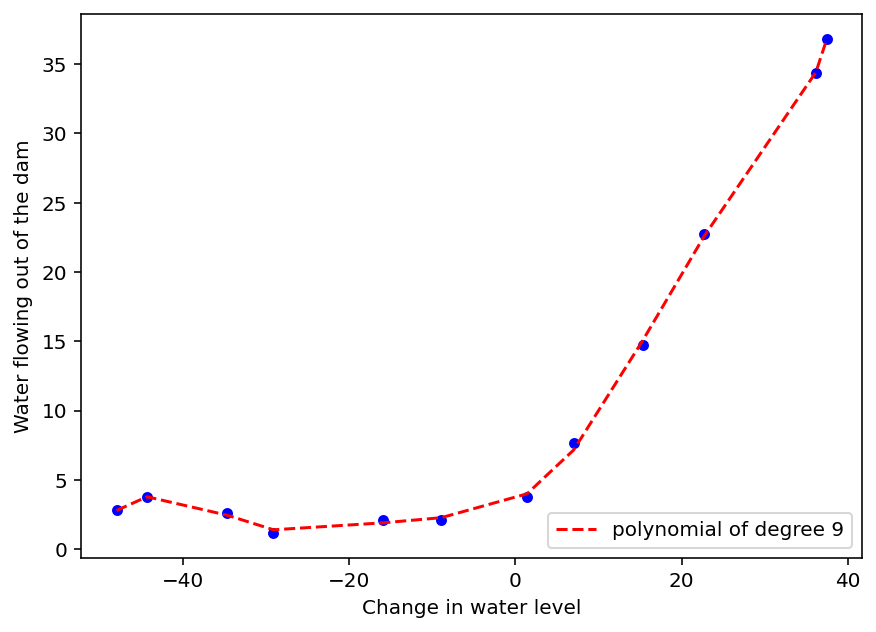

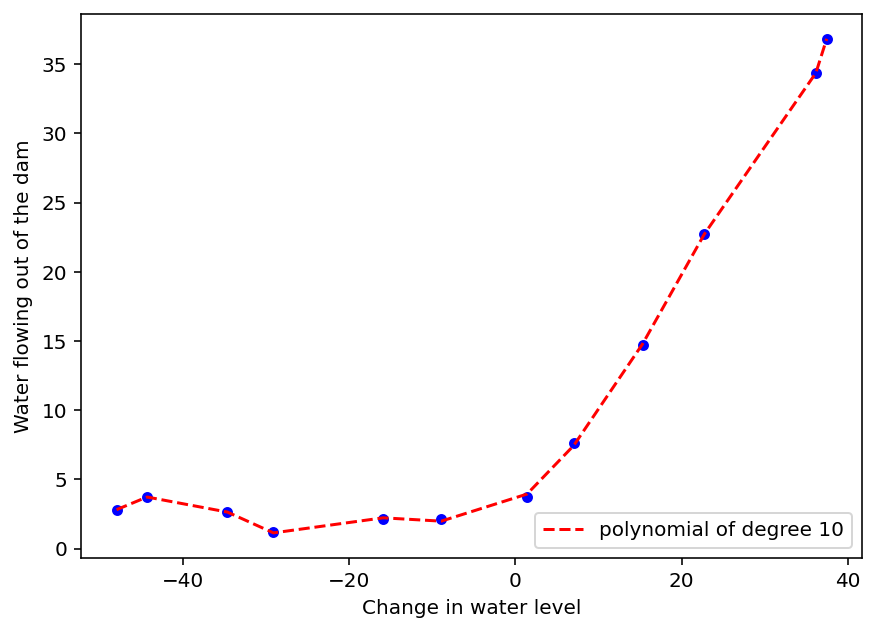

In [8]:
plot_poly(x, y, xlabel, ylabel)

How do we determine which one is the best fit?

Before digging into the previous question, let's make the following observation.

The hypothesis function for a polynomial fit has the structure
$$ h_\beta (x) = p(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots $$

by making the substitution $x^{(k)} = x^k$ we can use the multivariable _linear_ regression and write down

$$h_\beta(x) = X \cdot \beta = \begin{pmatrix} 1   & x^{(1)}_1 & x^{(2)}_1 & \\
                                                1   & x^{(1)}_2 & x^{(2)}_2 & \vdots\\
                                                    & \ldots & \ldots& \end{pmatrix} \begin{pmatrix} \beta_0 \\
                                                \beta_1 \\
                                                \vdots \end{pmatrix} \, . $$

Thus, thanks to this observation, from the computational point of view, polynomial regression is just a multivariable linear regression.

#### Complete the following

Write down the code to store the matrix $X$ of the dataset previously loaded, ready to be fed to a polynomial regression of degree $3$.

_Hint_: The function `np.power(a, n)` gives the element-wise $n$-th power of the array $a$.

In [9]:
x = np.array(x)

In [10]:
# complete
X = np.ones((len(x), 4))
X[:,1] = x
X[:,2] = np.power(x,2)
X[:,3] = np.power(x,3)

In [11]:
# If everything is completed properly, you should get this
X

array([[ 1.00000000e+00, -4.80588295e+01,  2.30965109e+03,
        -1.10999128e+05],
       [ 1.00000000e+00, -4.43837599e+01,  1.96991814e+03,
        -8.74323736e+04],
       [ 1.00000000e+00, -3.47062658e+01,  1.20452489e+03,
        -4.18045609e+04],
       [ 1.00000000e+00, -2.91529792e+01,  8.49896197e+02,
        -2.47770062e+04],
       [ 1.00000000e+00, -1.59367581e+01,  2.53980260e+02,
        -4.04762197e+03],
       [ 1.00000000e+00, -8.94145794e+00,  7.99496701e+01,
        -7.14866612e+02],
       [ 1.00000000e+00,  1.38915437e+00,  1.92974986e+00,
         2.68072045e+00],
       [ 1.00000000e+00,  7.01350208e+00,  4.91892115e+01,
         3.44988637e+02],
       [ 1.00000000e+00,  1.53077929e+01,  2.34328523e+02,
         3.58705250e+03],
       [ 1.00000000e+00,  2.27627489e+01,  5.18142738e+02,
         1.17943531e+04],
       [ 1.00000000e+00,  3.61895486e+01,  1.30968343e+03,
         4.73968522e+04],
       [ 1.00000000e+00,  3.74921873e+01,  1.40566411e+03,
      

And use `sklearn.linear_model.LinearRegression` to predict the value of the flow, if the observed water level is `level_test = 25`

In [12]:
# complete

level_test = 25
model = LinearRegression()
model.fit(X, y)

Xts = np.array([1, level_test, level_test**2, level_test**3]).reshape(1, -1)

prediction = model.predict(Xts)


print('Your predicted flow: %.10f' %prediction)
print('You should get approximatively: 22.32')

Your predicted flow: 22.3186877411
You should get approximatively: 22.32


### The Overfit problem

To start our discussion, let's plot again the trend curves as above. This can be done, by a new execution of the function `plot_poly`

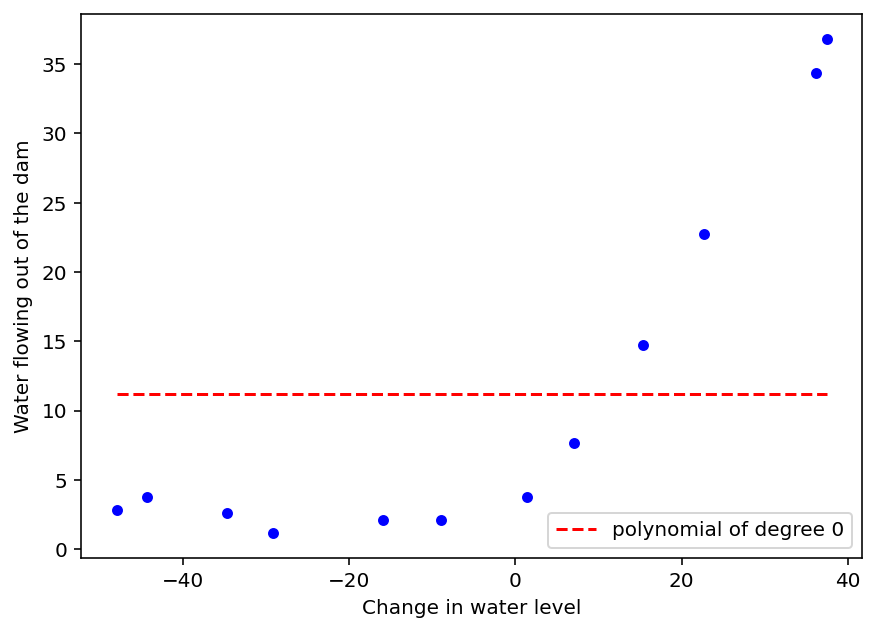

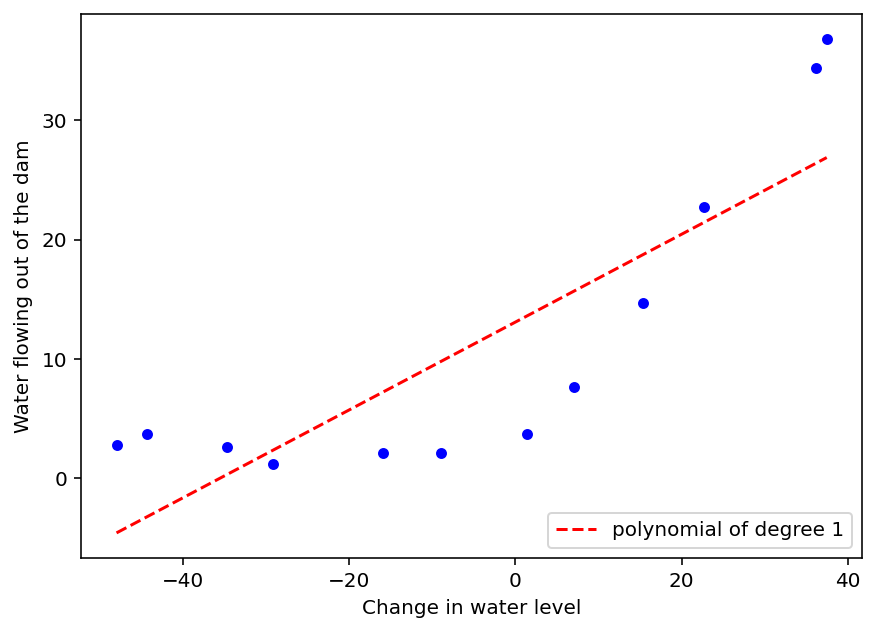

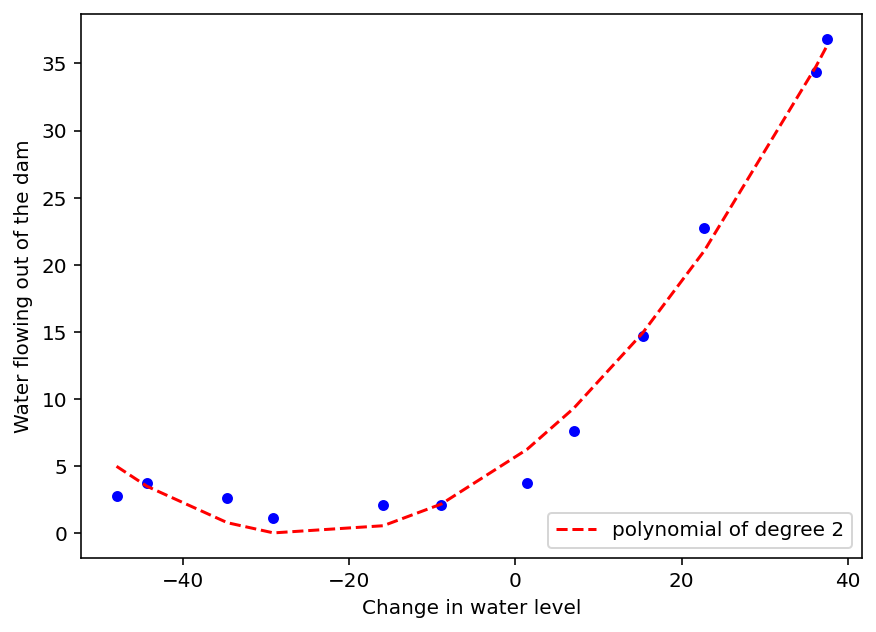

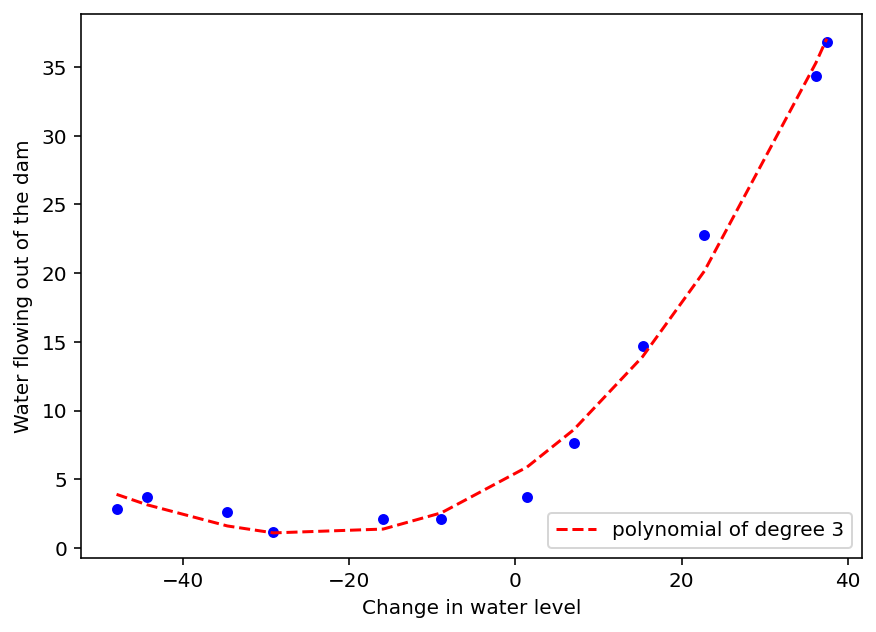

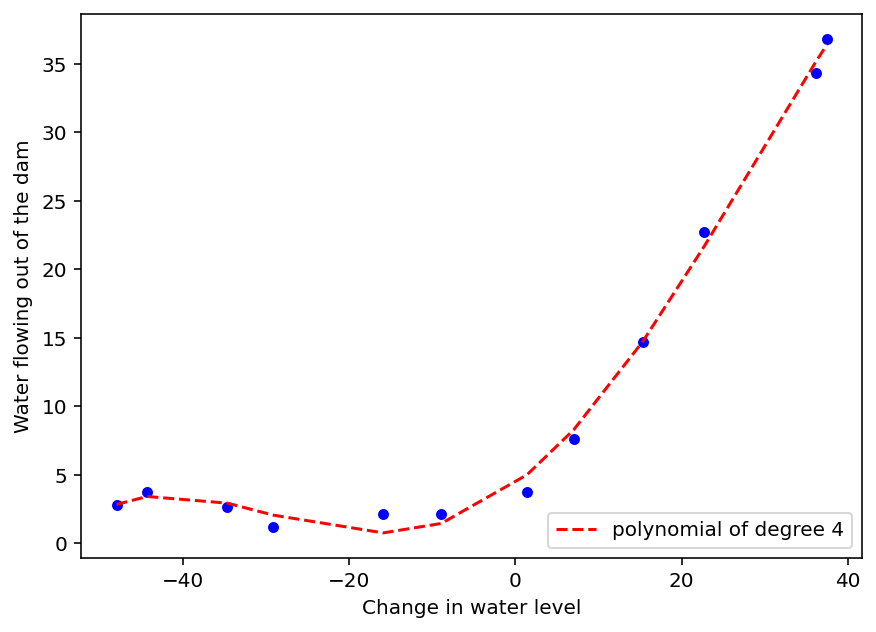

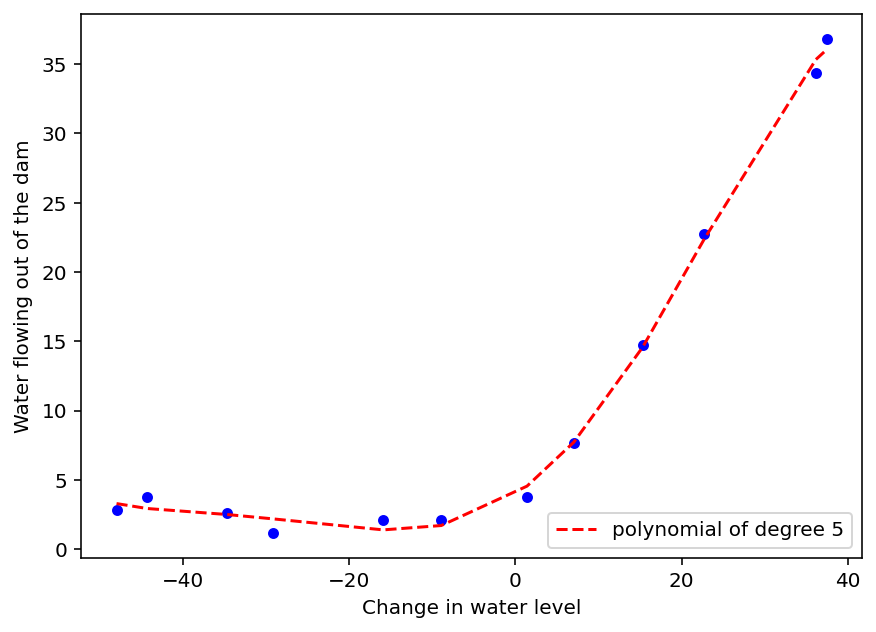

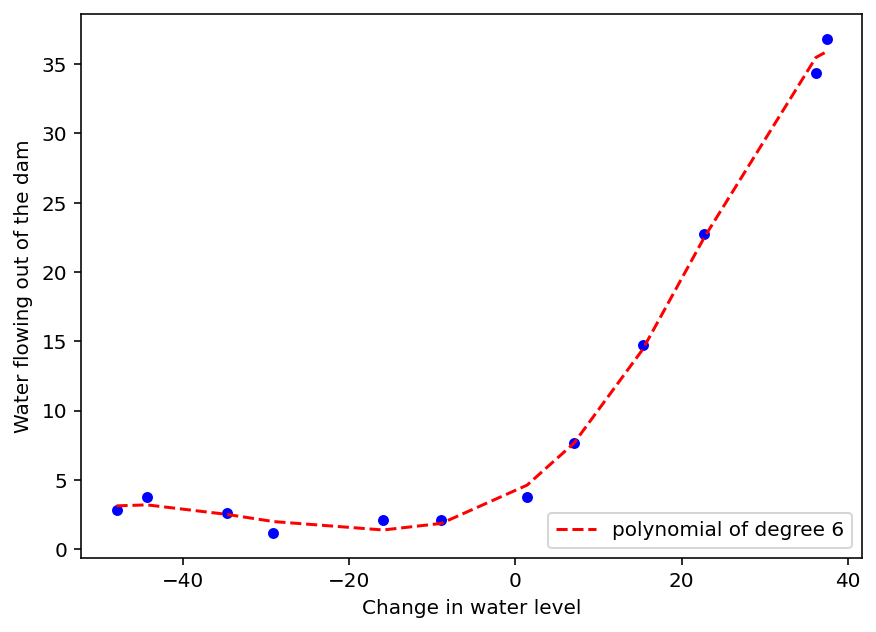

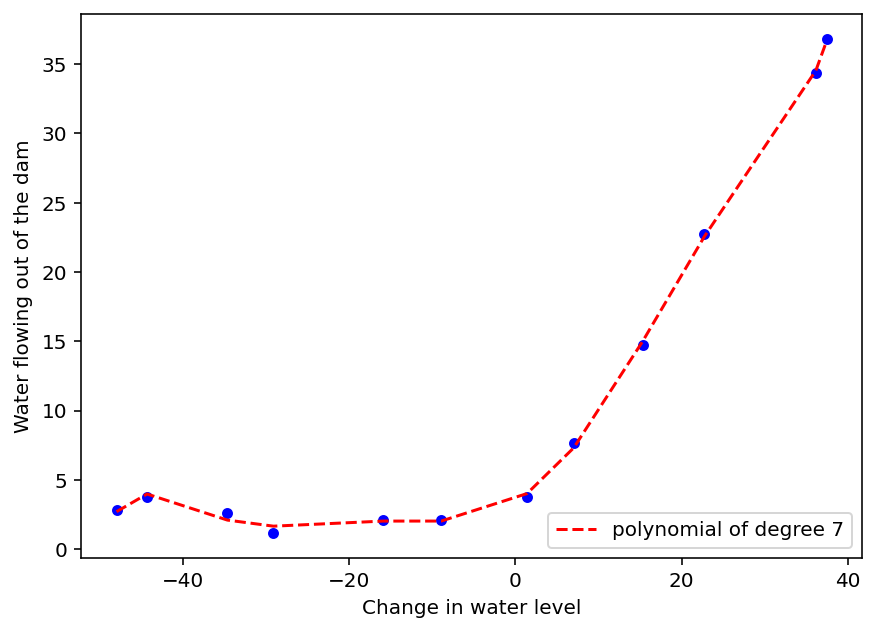

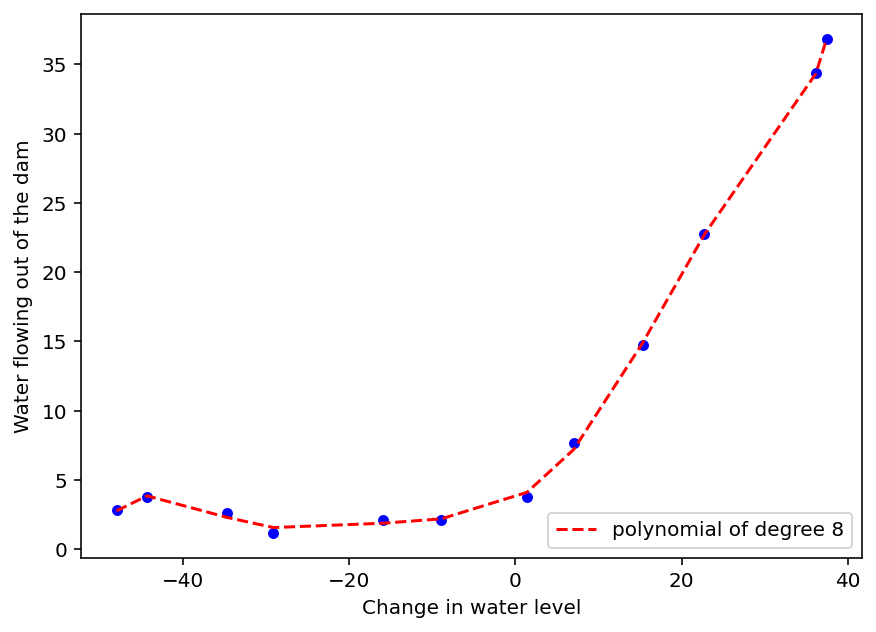

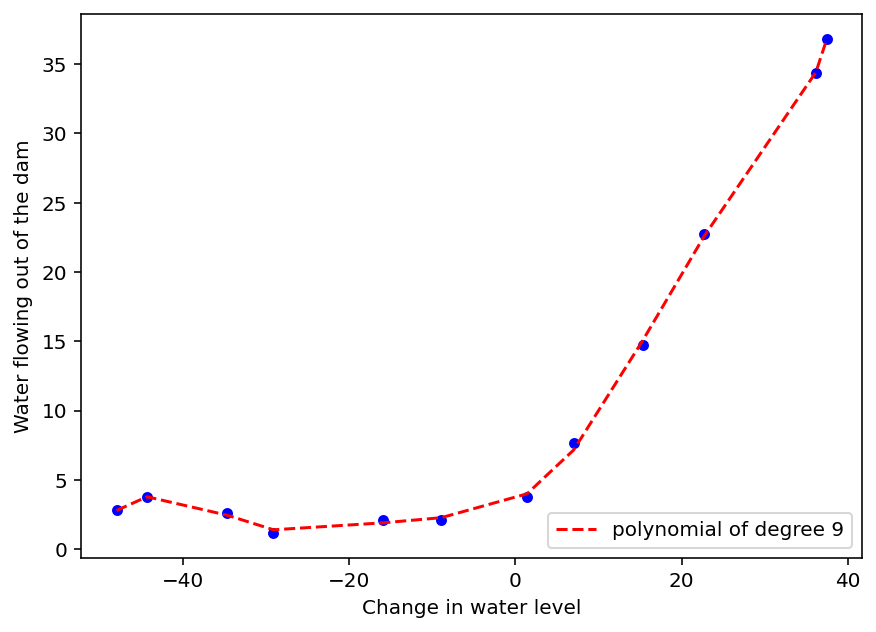

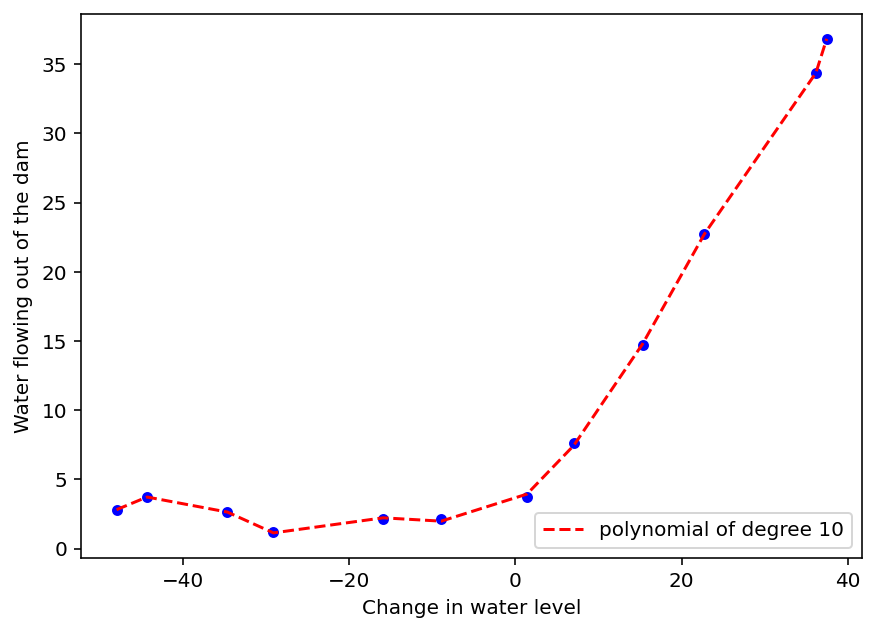

In [13]:
plot_poly(x, y, xlabel , ylabel)

The goal of this section is to answer the following question:
* How do we determine which one is the _best_ fit?

A naive answer might be the polynomial of order $10$ since it perfectly pass through all the points of the dataset.

However, one can immediately show that this poorly performs on predictions.

We now use `PolynomialFeatures` from `sklearn.preprocessing` to prepare data and `LinearRegression` to make predictions.

In [14]:
poly = PolynomialFeatures(10)
X_ = poly.fit_transform(x.reshape(-1,1))
level_test_array = poly.fit_transform(np.array(level_test).reshape(1,-1))

In [15]:
model.fit(X_, y)

LinearRegression()

In [16]:
prediction = model.predict(level_test_array)

print('Your predicted flow: %.10f' %prediction)
print('You should get approximatively: 22.32')

Your predicted flow: 23.6274419149
You should get approximatively: 22.32


Not really satisfying.

The situation gets even worst when the test point falls out of the initial data range.

In [17]:
level_test2 = -60
level_test2_array = poly.fit_transform(np.array(level_test2).reshape(1,-1))

In [18]:
prediction2 = model.predict(level_test2_array)

print('Your predicted flow: %.10f' %prediction2)
print('You should get approximatively: 6.78')

Your predicted flow: -418.4286862451
You should get approximatively: 6.78


Here the answer is completely wrong!

Let's explore the reasons a bit more.
First of all, we can plot in a bit wider range the ten-degree polynomial and the three-degree one.

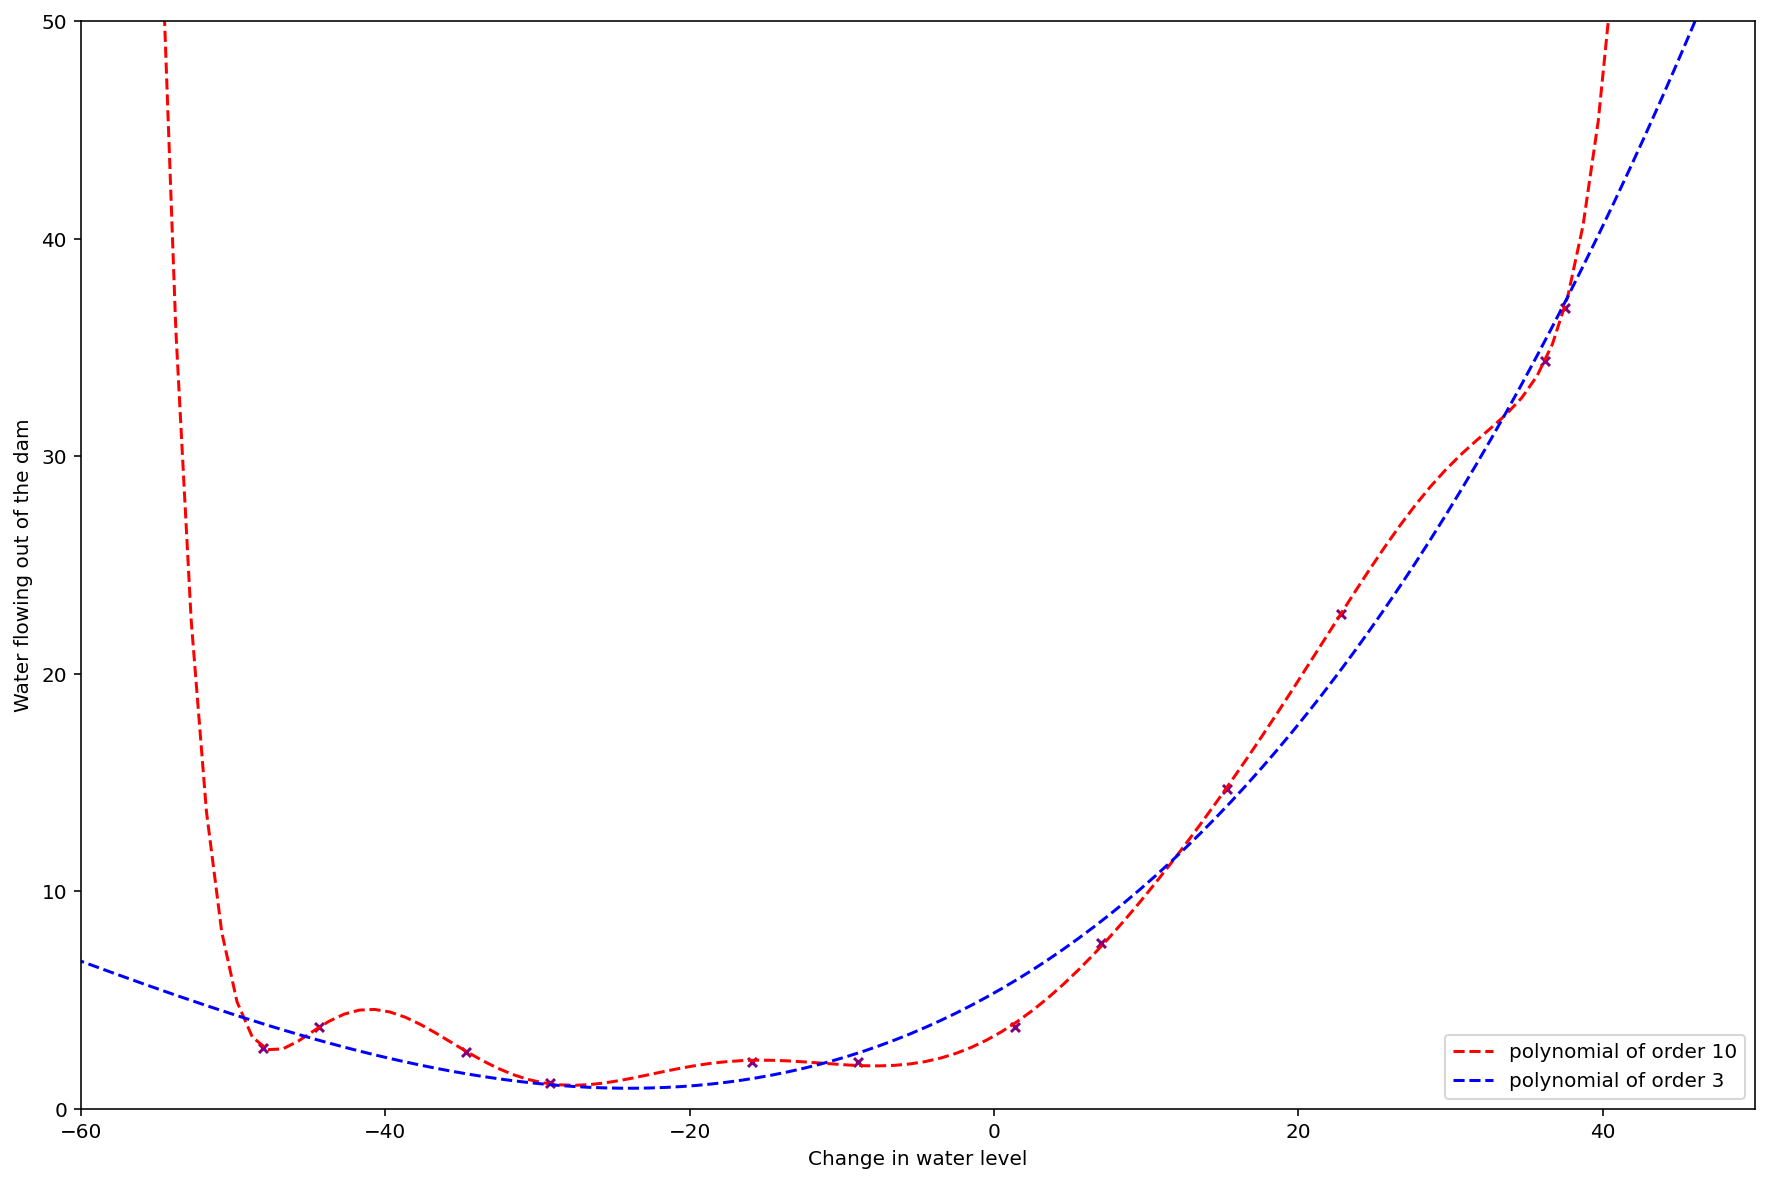

In [19]:
measures.plot(kind='scatter', x = xlabel, y = ylabel, marker = 'x', color='purple', figsize=(15,10))
xx = np.linspace(start=-100, stop=100, num=200)
z10 = np.polyfit(x, y, 10)
p = np.poly1d(z10)
plt.plot(xx, p(xx), "r--", label = 'polynomial of order 10')
z3 = np.polyfit(x, y, 3)
p = np.poly1d(z3)
plt.plot(xx, p(xx), "b--", label = 'polynomial of order 3')
plt.xlim(-60, 50)
plt.ylim(0,50)
pst = plt.legend(loc='lower right', frameon=True)

As you can see, the red line perfectly pass trough all the points, however, it loses predictivity on new data points.
This issue is something typical in statistical procedures and when one handles a dataset describing complex situations (_i.e._ with a lot of features) and it is commonly known under the name of __overfitting__. 

To give a more precise definition of overfitting, one can say

> __Overfitting__ is the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit further additional data or predict future observations reliably.

> An __overfitted model__ is a statistical model that contains more parameters than can be justified by the data.

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/600px-Overfitting.svg.png)

In other words, we have more (or a comparable number) coefficients to estimate than data points.

In the case above, we had to predict $11$ coefficients (for a ten-degree polynomial) with $12$ datapoints.
Indeed, if we try a polynomial of order $12$ for instance, python will give us a warning.

In [20]:
z = np.polyfit(x, y, 12)

/Users/oscardefelice/miniconda3/envs/dl_lectures/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


How do we face this issue?

We have several possibilities:

1. Reduce the number of parameters, _i.e._ the number of features
2. Use a bigger dataset
3. Use a different fit function

The point 1. and 3. can be implemented easily, the point 2. is not always easy to adopt. Furthermore, it might be not always a good idea to take new data, even ignoring all the issues related to data access, etc.

Even when we know how to fix this issue, we still ignore how to dectect it.
Just to rephrase, we do not know which one is the _right_ polynomial fit to use, if one exists.

We need a measure of the wellness of the fit, and this cannot be the cost function on the training dataset, since using this will lead to the overfit and to a loss of predictivity.

### Underfitting

In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and cannot be generalized to other data).

![title](https://miro.medium.com/max/1110/1*tBErXYVvTw2jSUYK7thU2A.png)

In Machine Learning literature, an underfitted model is also known as affected of _high bias_, while the overfitting also goes under the name of _variance_.

## Excercise

Determine (giving a numerical answer) which one is the best fit for the data above.

## Test and Cross validation sets

To avoid such issues, we follow such strategy.

We split the database into three pieces.

* __Training Set__: this data set is used to adjust the weights of the model.

* __Cross Validation Set__: this data set is used to minimize overfitting. You're not adjusting the weights of the model with this data set, you are just verifying that any increase in accuracy over the training data set actually yields an increase in accuracy over a data set that has not been shown to the algorithm before, or at least it has not trained on it (i.e. validation data set). If the accuracy over the training data set increases, but the accuracy over the validation data set stays the same or decreases, then you are overfitting your model and you should stop training.

* __Testing Set__: this data set is used only for testing the final solution in order to confirm the actual predictive power of the network.

![title](https://www.researchgate.net/publication/307087929/figure/fig6/AS:399685689856008@1472303902570/For-cross-validation-and-cross-testing-data-are-divided-into-two-separate-sets-only.png)

We can describe the simplest version of our strategy as follows.

Split the full dataset into training set, test set and cross validation set. Typically, the splitting is $70\%$-$10\%$-$20\%$.

Train the algorithm on the training set, getting weights from this procedure.
Hence, adjust other parameters of the model on the cross-validation set (_i.e._ determine thresholds, number of classes, etc.)
Finally, compute on the test set error the accuracy of your model.

We are going to give more details about validation procedures later. Now we prefer rather to focus on an example.

## Working Example

In [21]:
wine = datasets.load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['label'] = wine.target

In [22]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


This dataset is a composed of data about wines. It is a sort of tabular evaluation of different wines, compiled by a very conscientious (and expert on chemistry) critic.

Finally, we have a column grading the wine quality.

There are several possibilities, for instance, one may think to apply a classification algorithm and train a model to give a scoreto a wine based on wine features.

To begin, we split the full dataset into training and test set (we leave the validation one apart for the moment being). `sklearn` will help us in this task.

Then, we can train, for example, a logistic regression classifier on our training dataset.

In [23]:
y = df_wine.label # Define which one is the target/label variable.
X = df_wine.loc[:, df_wine.columns[:-1]]
# create training and testing sets, ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
# Define and train the model
lg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

At this stage, we can make a check on how many good results the algorithm predicts, using the test set.

In [25]:
y_pred = lg.predict(X_test)

print('Error: %.3f %%' %((y_pred!=y_test).mean()*100))

Error: 1.852 %


We have about a $5.5\%$ of error. However, since the dataset is not big, one may be more accurate by giving the error as an absolute value.

In [26]:
(y_pred!=y_test).describe()

count        54
unique        2
top       False
freq         53
Name: label, dtype: object

We missed the predition $3$ times. This gives us a measure of how well the algorithm performs.

## Exercise

Making use of the breast cancer dataset, compute the error on a test set which is the $20\%$ of the full dataset.

Study how such error changes by changing the dimension of the test set.
Plot your answer.

In [27]:
cancer = datasets.load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_cancer['target'] = cancer.target
X = df_cancer.loc[:, cancer.feature_names]
y = df_cancer.target

In [28]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [29]:
# create training and testing sets, ratio 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
model = LogisticRegression(solver = 'newton-cg')
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [31]:
y_pred = model.predict(X_test)

print('Error: %.2f %%' %((y_pred!= y_test).mean()*100))

Error: 6.14 %


In [32]:
model.score(X_test,y_test)

0.9385964912280702

This error can be calculated also by an attribute of the model, `score`.

In [33]:
print('Score: %.1f %%'%(model.score(X_test, y_test)*100))

Score: 93.9 %


### Learning rates

Test multiple learning rates, and plot the cost for each learning rate per the iterations.

Which of the three sets would you use to complete this task?